## Housing Price Prediction

##### Build a regression model that predicts the prices of houses based on features like location, size, and number of rooms. In this project, the datast is from kaggle.com and it's California Housing Prices.

### 1. importing libraries:

In [33]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as plt

### Loading Data

In [117]:
df = pd.read_csv('Housing.csv')

In [35]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [229]:
max(df['price'])

13300000

### 2. Preprocessing the data frame:

#### 2.1 Checking the data types:

In [36]:
df.dtypes

price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object

In [85]:
cnt = 0 
for col in df:
    if df[col].dtypes == object:
        cnt += 1
print (cnt)


7


##### To check how many unique datas there are

In [86]:
{col : df[col].nunique() for col in df if df[col].dtypes == object}

{'mainroad': 2,
 'guestroom': 2,
 'basement': 2,
 'hotwaterheating': 2,
 'airconditioning': 2,
 'prefarea': 2,
 'furnishingstatus': 3}

#### 2.2 Changing the object types to categorical type

In [92]:
def changing_types_to_category(dataframe):
    for col in dataframe:
        if dataframe[col].dtypes == object:
            dataframe = dataframe.astype({
                col : 'category',
        })
    return dataframe

In [178]:
df_2 = changing_types_to_category(df)

In [179]:
df_2.dtypes

price                  int64
area                   int64
bedrooms               int64
bathrooms              int64
stories                int64
mainroad            category
guestroom           category
basement            category
hotwaterheating     category
airconditioning     category
parking                int64
prefarea            category
furnishingstatus    category
dtype: object

##### converting 'no'/'yes's to 0/1:

In [171]:
df_3 = df

In [180]:
count = 0
new_value = "semi_furnished"
index = 0

for row in df_2['furnishingstatus']:
    
    if row == "semi-furnished":
        df_2['furnishingstatus'][index] = new_value
        count += 1
    index += 1
    
print(count, row)

0 unfurnished


In [181]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi_furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [182]:
## no --> 0
## yes --> 1
def converting_to_numbers(dataframe):
    for col in dataframe:
        if (dataframe[col].nunique() == 2):
            dataframe[col] = dataframe[col].cat.codes
            
    return dataframe

In [183]:
converting_to_numbers(df_2)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi_furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,unfurnished
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,semi_furnished
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,unfurnished
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,furnished


In [184]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi_furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [185]:
df_2.nunique()

price               219
area                284
bedrooms              6
bathrooms             4
stories               4
mainroad              2
guestroom             2
basement              2
hotwaterheating       2
airconditioning       2
parking               4
prefarea              2
furnishingstatus      3
dtype: int64

##### As it seems, Furnishing_status has 3 kinds of data, for more undersandable view, we can seprate it into 3 columns instead of 1.

In [186]:
df_2.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi_furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [187]:
df_2 = pd.get_dummies(df_2)
df_2

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_furnished,furnishingstatus_semi_furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,1,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,0,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,0,0,1
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,0,1,0
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,0,0,1
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,1,0,0


#### 2.3. Correlation

In [189]:
df_2.corr().style.background_gradient(cmap='Blues')

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_furnished,furnishingstatus_semi_furnished,furnishingstatus_unfurnished
price,1.000000,0.535997,0.366494,0.517545,0.420712,0.296898,0.255517,0.187057,0.093073,0.452954,0.384394,0.329777,0.229350,0.063656,-0.280587
area,0.535997,1.000000,0.151858,0.193820,0.083996,0.288874,0.140297,0.047417,-0.009229,0.222393,0.352980,0.234779,0.145772,0.006156,-0.142278
bedrooms,0.366494,0.151858,1.000000,0.373930,0.408564,-0.012033,0.080549,0.097312,0.046049,0.160603,0.139270,0.079023,0.079054,0.050040,-0.126252
bathrooms,0.517545,0.193820,0.373930,1.000000,0.326165,0.042398,0.126469,0.102106,0.067159,0.186915,0.177496,0.063472,0.108139,0.029834,-0.132107
stories,0.420712,0.083996,0.408564,0.326165,1.000000,0.121706,0.043538,-0.172394,0.018847,0.293602,0.045547,0.044425,0.093176,-0.003648,-0.082972
mainroad,0.296898,0.288874,-0.012033,0.042398,0.121706,1.000000,0.092337,0.044002,-0.011781,0.105423,0.204433,0.199876,0.129971,0.011450,-0.133123
guestroom,0.255517,0.140297,0.080549,0.126469,0.043538,0.092337,1.000000,0.372066,-0.010308,0.138179,0.037466,0.160897,0.099721,0.005821,-0.099023
basement,0.187057,0.047417,0.097312,0.102106,-0.172394,0.044002,0.372066,1.000000,0.004385,0.047341,0.051497,0.228083,0.069852,0.050284,-0.117935
hotwaterheating,0.093073,-0.009229,0.046049,0.067159,0.018847,-0.011781,-0.010308,0.004385,1.000000,-0.130023,0.067864,-0.059411,-0.008472,0.063819,-0.059194
airconditioning,0.452954,0.222393,0.160603,0.186915,0.293602,0.105423,0.138179,0.047341,-0.130023,1.000000,0.159173,0.117382,0.160994,-0.053179,-0.094086


#### 2.4. Describing Data

In [190]:
df_2.describe()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_furnished,furnishingstatus_semi_furnished,furnishingstatus_unfurnished
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.858716,0.177982,0.350459,0.045872,0.315596,0.693578,0.234862,0.256881,0.416514,0.326606
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.348635,0.382849,0.477552,0.209399,0.465180,0.861586,0.424302,0.437314,0.493434,0.469402
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000


> Data should be rescaler, it'll be done later...

#### 2.5. Missing Values

In [191]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 15 columns):
 #   Column                           Non-Null Count  Dtype
---  ------                           --------------  -----
 0   price                            545 non-null    int64
 1   area                             545 non-null    int64
 2   bedrooms                         545 non-null    int64
 3   bathrooms                        545 non-null    int64
 4   stories                          545 non-null    int64
 5   mainroad                         545 non-null    int8 
 6   guestroom                        545 non-null    int8 
 7   basement                         545 non-null    int8 
 8   hotwaterheating                  545 non-null    int8 
 9   airconditioning                  545 non-null    int8 
 10  parking                          545 non-null    int64
 11  prefarea                         545 non-null    int8 
 12  furnishingstatus_furnished       545 non-null    u

> there is no missing value, for more prof we can use isna():

In [192]:
df_2.isna().sum()

price                              0
area                               0
bedrooms                           0
bathrooms                          0
stories                            0
mainroad                           0
guestroom                          0
basement                           0
hotwaterheating                    0
airconditioning                    0
parking                            0
prefarea                           0
furnishingstatus_furnished         0
furnishingstatus_semi_furnished    0
furnishingstatus_unfurnished       0
dtype: int64

### 3. Seprating the target value (test and train):

In [193]:
from sklearn.model_selection import train_test_split

In [194]:
np.random.seed(0)  ### to make the test and train datas the same test and trains when the code runs every time.
df_train, df_test = train_test_split(df_2, train_size = 0.8, test_size = 0.2, random_state = 100)

### 20% of data will be reserved fo evaluating

### Rescaling datas (with min_max scaling):

In [195]:
from sklearn.preprocessing import MinMaxScaler

In [196]:
scaler = MinMaxScaler()

In [197]:
var = ['area', 'price', 'bedrooms', 'bathrooms', 'stories', 'parking']

In [198]:
df_train[var] = scaler.fit_transform(df_train[var])

In [199]:
df_test[var] = scaler.fit_transform(df_test[var])

In [200]:
df_train.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_furnished,furnishingstatus_semi_furnished,furnishingstatus_unfurnished
22,0.596970,0.432609,0.4,0.000000,0.000000,1,1,1,0,1,0.333333,0,1,0,0
41,0.527273,0.314954,0.4,0.333333,1.000000,1,0,0,0,1,0.000000,1,1,0,0
91,0.404242,0.342105,0.2,0.000000,0.000000,1,1,1,0,0,0.666667,1,1,0,0
118,0.363636,0.319131,0.4,0.000000,0.000000,1,0,1,0,1,0.000000,1,1,0,0
472,0.109091,0.124896,0.6,0.000000,0.333333,1,0,0,0,0,1.000000,0,0,1,0


In [201]:
df_train.describe()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_furnished,furnishingstatus_semi_furnished,furnishingstatus_unfurnished
count,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000
mean,0.263699,0.230390,0.388532,0.097095,0.272936,0.862385,0.172018,0.353211,0.055046,0.300459,0.243884,0.231651,0.259174,0.412844,0.327982
std,0.161666,0.149756,0.145923,0.167627,0.294125,0.344891,0.377830,0.478517,0.228332,0.458984,0.287502,0.422372,0.438685,0.492911,0.470017
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.151515,0.119848,0.200000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.223333,0.186508,0.400000,0.000000,0.333333,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.351061,0.319131,0.400000,0.333333,0.333333,1.000000,0.000000,1.000000,0.000000,1.000000,0.333333,0.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<Axes: >

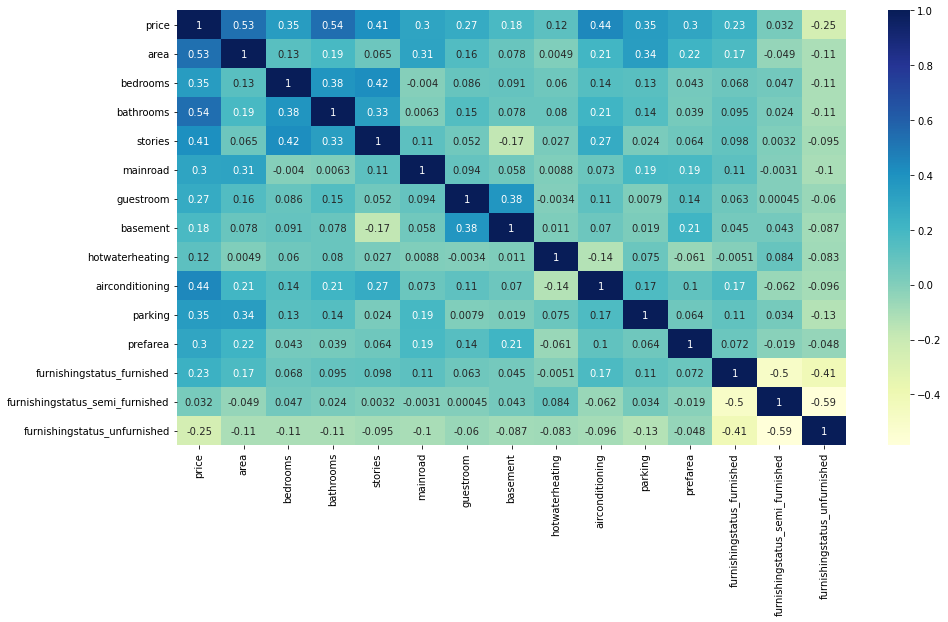

In [202]:
plt.pyplot.figure(figsize=(15,8))
sns.heatmap(df_train.corr(), annot=True, cmap="YlGnBu")

> area and price are correlated the most.

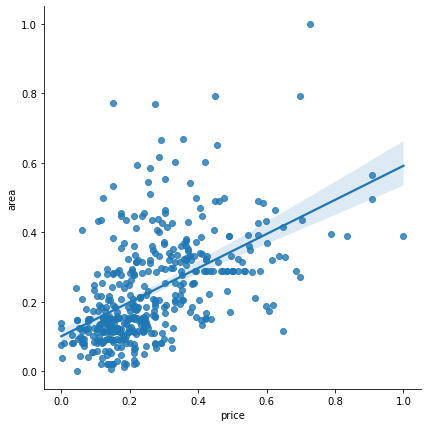

In [203]:
## to have a close look, pairplot would be helpfull
sns.pairplot(df_train, palette=None, x_vars=['price'], y_vars=['area'], kind='reg', height=6)

In [204]:
def make_it_more_gausion(dataframe, a_list):
    for i in a_list:
        dataframe[i] = np.log(dataframe[i] + 1)
    return (dataframe)

##### As a sample, it is just for sample variable:

In [44]:
s = df_train

array([[<Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'area'}>,
        <Axes: title={'center': 'bedrooms'}>,
        <Axes: title={'center': 'bathrooms'}>],
       [<Axes: title={'center': 'stories'}>,
        <Axes: title={'center': 'mainroad'}>,
        <Axes: title={'center': 'guestroom'}>,
        <Axes: title={'center': 'basement'}>],
       [<Axes: title={'center': 'hotwaterheating'}>,
        <Axes: title={'center': 'airconditioning'}>,
        <Axes: title={'center': 'parking'}>,
        <Axes: title={'center': 'prefarea'}>],
       [<Axes: title={'center': 'furnishingstatus_furnished'}>,
        <Axes: title={'center': 'furnishingstatus_semi-furnished'}>,
        <Axes: title={'center': 'furnishingstatus_unfurnished'}>,
        <Axes: >]], dtype=object)

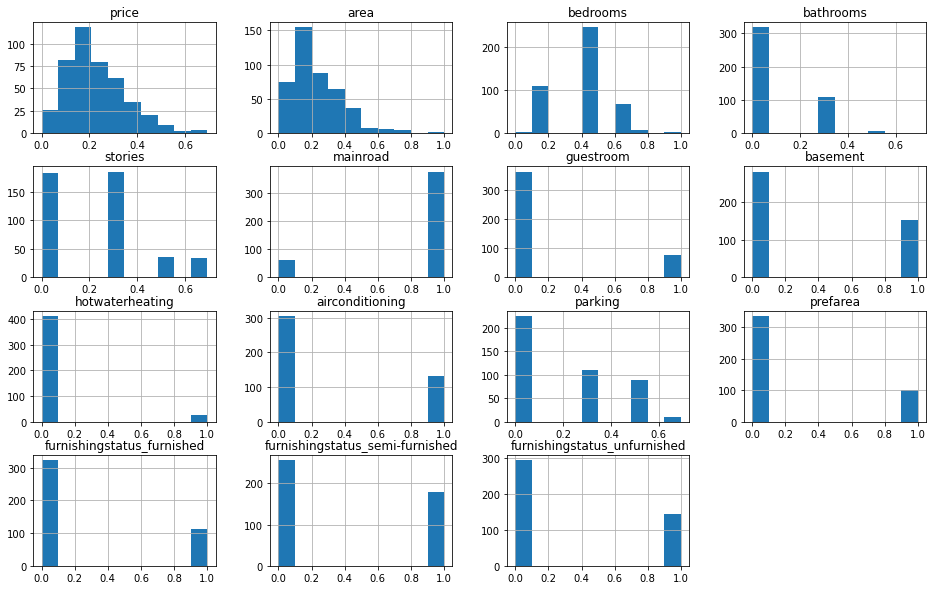

In [45]:
make_it_more_gausion(s, ['price', 'bathrooms', 'stories', 'parking'])
s.hist(figsize=(16,10))

> Better not to do it.

<Axes: xlabel='area', ylabel='price'>

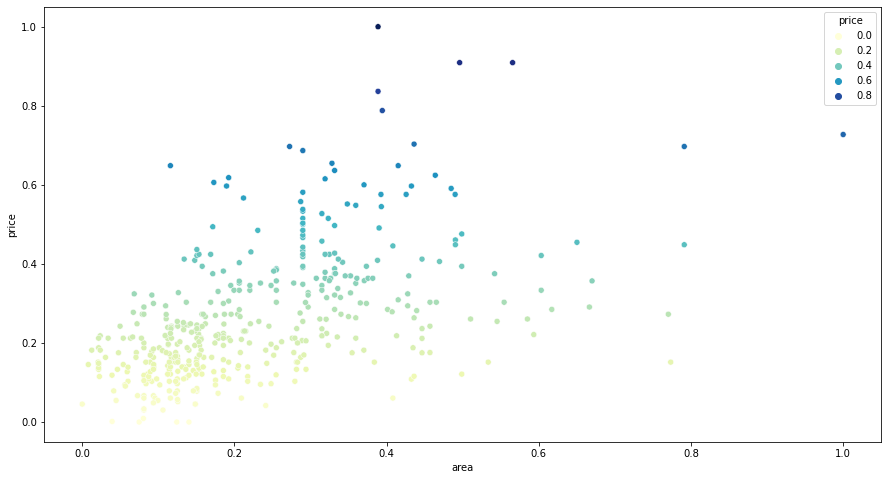

In [205]:
plt.pyplot.figure(figsize=(15, 8))
sns.scatterplot(x='area', y='price', hue='price', data=df_train, palette='YlGnBu')

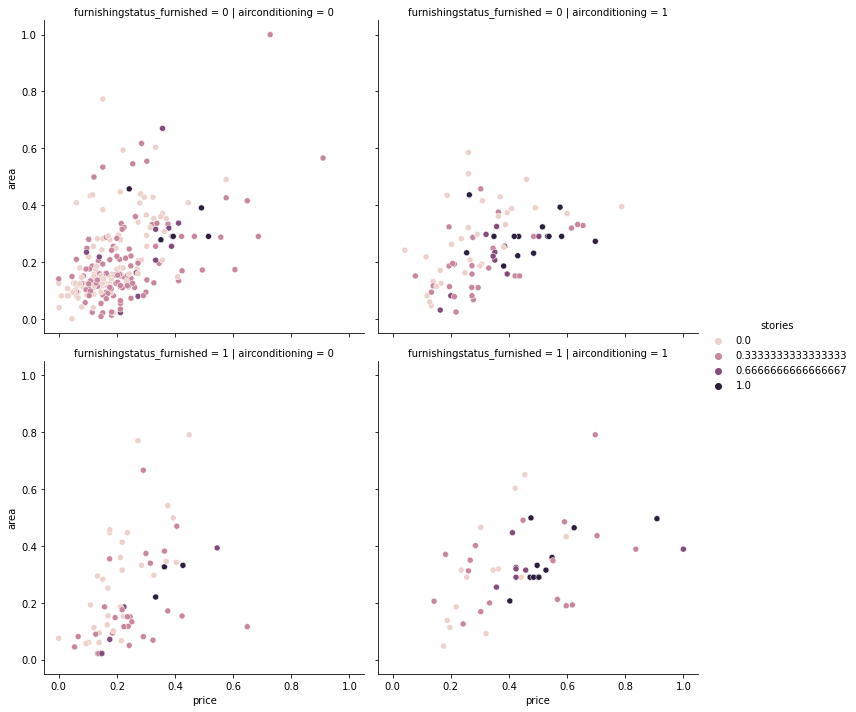

In [206]:
# sns.relplot(data=train_data, x="price", y="area", hue="furnishingstatus_furnished")
sns.relplot(data=df_train, x="price", y="area", hue="stories", col="airconditioning", row="furnishingstatus_furnished")

#### spliting X and y for model:

In [207]:
y_train = df_train.pop('price')
X_train = df_train

In [208]:
X_train.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_furnished,furnishingstatus_semi_furnished,furnishingstatus_unfurnished
22,0.432609,0.4,0.000000,0.000000,1,1,1,0,1,0.333333,0,1,0,0
41,0.314954,0.4,0.333333,1.000000,1,0,0,0,1,0.000000,1,1,0,0
91,0.342105,0.2,0.000000,0.000000,1,1,1,0,0,0.666667,1,1,0,0
118,0.319131,0.4,0.000000,0.000000,1,0,1,0,1,0.000000,1,1,0,0
472,0.124896,0.6,0.000000,0.333333,1,0,0,0,0,1.000000,0,0,1,0


In [209]:
from sklearn.linear_model import LinearRegression

In [210]:
reg = LinearRegression()

reg.fit(X_train, y_train)

LinearRegression()

In [211]:
df_test

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_furnished,furnishingstatus_semi_furnished,furnishingstatus_unfurnished
265,0.248485,0.088172,0.333333,0.0,0.333333,1,0,0,0,0,0.000000,1,0,1,0
54,0.531987,0.311828,0.333333,0.5,0.333333,1,1,0,0,1,0.333333,0,0,1,0
171,0.329966,0.617849,0.333333,0.0,0.000000,1,0,0,0,0,0.333333,1,0,1,0
244,0.262626,0.263082,0.333333,0.0,0.333333,1,1,1,0,0,0.000000,1,0,1,0
268,0.246465,0.236559,0.666667,0.0,0.333333,1,0,0,0,1,0.000000,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
451,0.127946,0.365591,0.000000,0.0,0.000000,1,0,0,0,0,0.000000,0,0,1,0
320,0.215488,0.191398,0.333333,0.0,0.333333,1,0,0,0,0,0.666667,1,1,0,0
424,0.148148,0.103943,0.333333,0.0,0.333333,0,0,1,0,0,0.000000,0,0,1,0
338,0.198653,0.152688,0.000000,0.0,0.333333,1,1,1,0,0,0.000000,0,0,1,0


In [212]:
y_test = df_test.pop('price')
X_test = df_test

In [223]:
my_di = {
    "area" : 0.088172,
    "bedrooms" : 0.333333,
    "bathrooms" : 0.2,
    "stories" : 0.333333,
    "mainroad" : 1,
    "guestroom" : 0,
    "basement" : 0,
    "hotwaterheating" : 0,
    "airconditioning" : 0.000000,
    "parking" : 1,
    "prefarea" : 1,
    "furnishingstatus_furnished" : 0,
    "furnishingstatus_semi_furnished" : 1,
    "furnishingstatus_unfurnished" : 0
}

In [224]:
df_new = pd.DataFrame([my_di.values()], columns=my_di.keys())
reg.predict(df_new)

array([0.31650369])

In [213]:
reg.score(X_test, y_test)

0.64462467952745

In [214]:
import pickle

In [216]:
with open('housing_price_prediction.pkl', 'wb') as model_file:
    pickle.dump(reg, model_file)